<a href="https://colab.research.google.com/github/RCNXV/Dentist-Patient-Visit-Predictions./blob/main/Dentist_Patient_Visit_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

Background: 

There has been an increase in outpatient visits to dentists in City X. This is associated with consumption of sweet foods. With the increase in sales of sugary foods, it has the potential to affect the rate of visits to the dentist. See if there's a link between increased patient visits and sweet sales!

# File Unloading

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive0', force_remount=True)
pd.set_option('display.max_columns', None)

Mounted at /content/drive0


The datasets used are patient visit data and sweet food sales data.

In [2]:
df_visit = pd.read_csv("/content/drive0/MyDrive/Kerja/DA/Portofolio/Dentist Patient Visit Predictions/Dataset/city_x_dentist_visits.tsv", sep="\t")
df_sales = pd.read_csv("/content/drive0/MyDrive/Kerja/DA/Portofolio/Dentist Patient Visit Predictions/Dataset/city_x_food_sales.tsv", sep="\t")

Check the first dataset

In [3]:
print("df_visit size:", df_visit.shape)

df_visit.columns = ['Month','Year','the rate of visits to the dentist']
df_visit

df_visit size: (24, 3)


,Month,Year,the rate of visits to the dentist
0,1,1996,37
1,2,1996,32
2,3,1996,56
3,4,1996,43
4,5,1996,52
5,6,1996,70
6,7,1996,64
7,8,1996,88
8,9,1996,74
9,10,1996,98


there are 3 columns, namely month, year, and rate of visits. there is no missing value in it. 
next is check the second dataset.

In [4]:
print('df_sales size:', df_sales.shape)

df_sales.columns = ['No','Month','Year','candy sales','cereal sales','banana sales']
df_sales

df_sales size: (24, 6)


,No,Month,Year,candy sales,cereal sales,banana sales
0,1,1,1996,200661,10324,112146
1,2,2,1996,297141,13150,175417
2,3,3,1996,235586,5398,104645
3,4,4,1996,299498,7609,112283
4,5,5,1996,395824,5190,137083
5,6,6,1996,247212,14571,198130
6,7,7,1996,273899,13407,194685
7,8,8,1996,184405,8914,100091
8,9,9,1996,141211,3663,194972
9,10,10,1996,292225,14756,133166


there are 6 columns, namely number, month, year, candy sales, cereal sales, and banana sales. There is no missing value in it.

# Data Preparation

Merge the two datasets before creating a regression model, because in both datasets there are similarities, namely the 'Month' and 'Year' columns. Then these 'Months' and 'Years' are combined into a 'Period' column. So that both datasets have the same column, that is 'Period' column. merge the two using inner join.

In [5]:
str_month = lambda x: "0"+str(x) if x<10 else str(x)
df_visit["Period"] = df_visit["Year"].map(str) + "-" + df_visit["Month"].map(str_month)
df_sales["Period"] = df_sales["Year"].map(str) + "-" + df_sales["Month"].map(str_month)

df = (df_visit.drop(columns=["Month", "Year"])
              .set_index('Period')
              .join(df_sales.drop(columns=["No", "Month", "Year"])
                            .set_index('Period')))

df

,the rate of visits to the dentist,candy sales,cereal sales,banana sales
Period,,,,
1996-01,37,200661,10324,112146
1996-02,32,297141,13150,175417
1996-03,56,235586,5398,104645
1996-04,43,299498,7609,112283
1996-05,52,395824,5190,137083
1996-06,70,247212,14571,198130
1996-07,64,273899,13407,194685
1996-08,88,184405,8914,100091
1996-09,74,141211,3663,194972


The Dataset is ready to use.

# Exploratory Data Analytics

See how each food sale relates to the rate of visits to the dentist using scatter plots.

In [6]:
import matplotlib.pyplot as plt

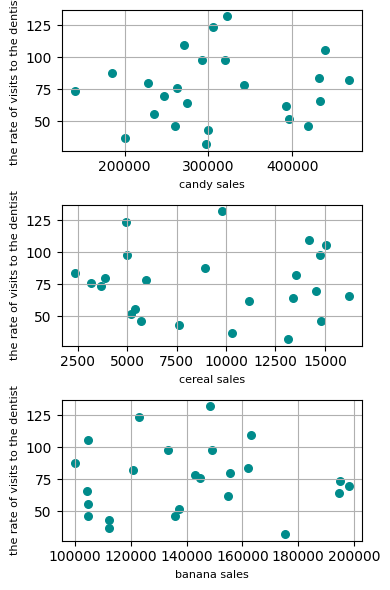

In [7]:
x_cols = df.columns[1:]
y_col = "the rate of visits to the dentist"

fig, axs = plt.subplots(len(x_cols), 1, figsize=(4,6))
for ax, x_col in zip(axs, x_cols):
    df.plot.scatter(x=x_col, y=y_col, c="darkcyan", s=30, ax=ax)
    ax.set_xlabel(x_col, fontsize=8)
    ax.set_ylabel(y_col, fontsize=8)
    ax.grid()
plt.tight_layout()
plt.show()

Since the relationship is still not clear, use the Pearson correlation coefficient.

In [8]:
print("Pearson correlation coefficient:")
print("--------------------------------")
print(df.corr()["the rate of visits to the dentist"])

Pearson correlation coefficient:
--------------------------------
the rate of visits to the dentist    1.000000
candy sales                          0.083333
cereal sales                        -0.027465
banana sales                         0.028650
Name: the rate of visits to the dentist, dtype: float64


Based on these results, candy sales have a significant influence on visits to the dentist.
But it makes no sense that the patient who buys candy, visits the dentist in the same month that he buys candy. For example, he bought in January, then went to the dentist in January.
Therefore, it is necessary to look at the relationship of sales in a particular month to visits in the following months, for example sales in January 1996, linked to the following months (Ex. February 1996). Such mapping is called the delayed effect for n months. Will be searched until 8 months delay.

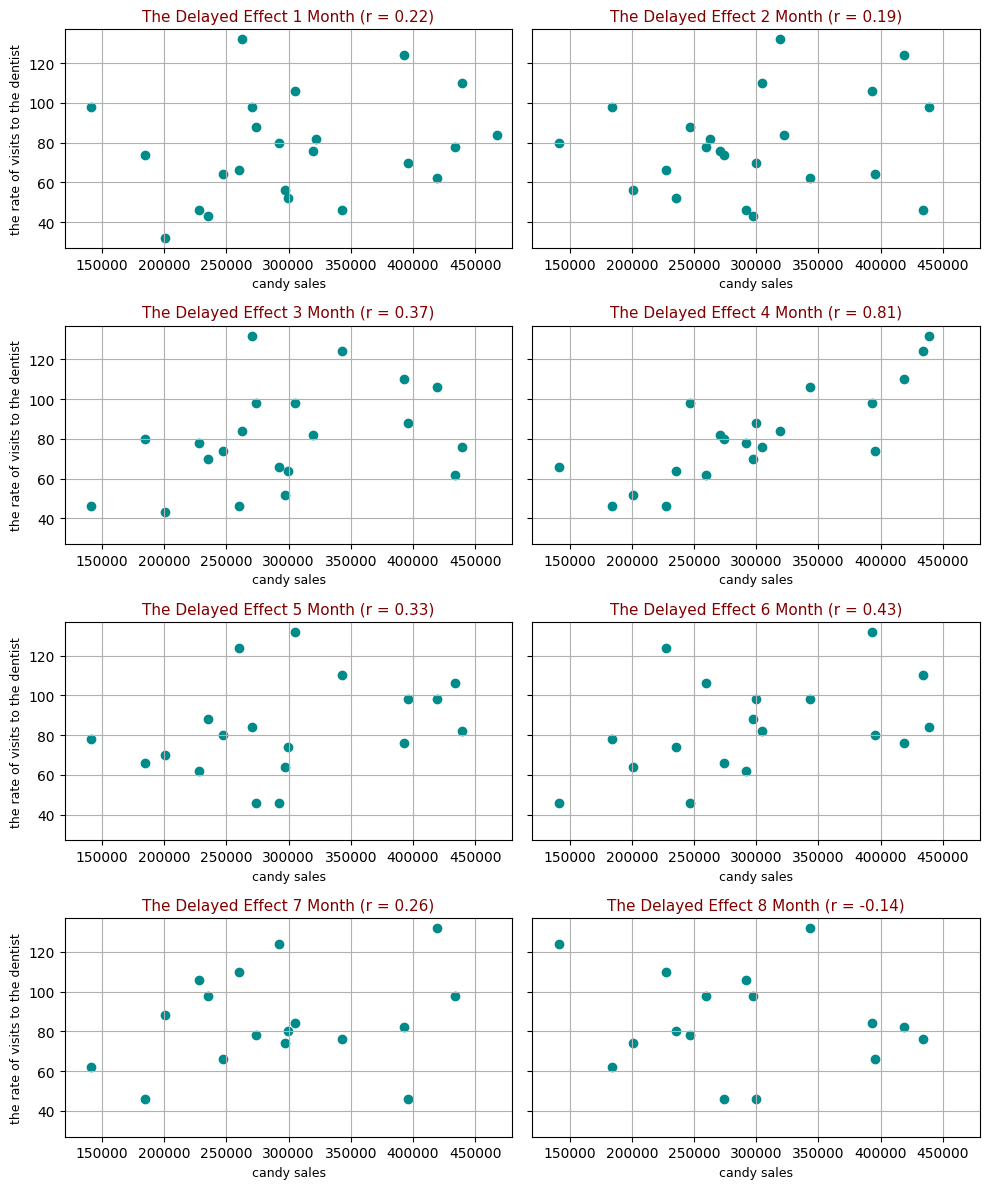

In [9]:
import matplotlib.pyplot as plt
from scipy import stats

#Specification of delay up to 8 months
n_delays = 8
#Specification of the number of columns for subplots
n_plt_cols = 2
fig, axs = plt.subplots(round(n_delays/2), n_plt_cols, figsize=(10, 3*round(n_delays/2)), sharey=True)
for i in range(n_delays):
    x = df["candy sales"][:-(i+1)]
    y = df["the rate of visits to the dentist"][i+1:]
    pearson_r, p_value = stats.pearsonr(x, y)
    title = "The Delayed Effect %d Month (r = %.2f)" % (i+1, pearson_r)
    
    ax = axs[i // n_plt_cols][i % n_plt_cols]
    ax.scatter(x, y, c="darkcyan")
    ax.set_title(title, fontsize=11, color="maroon")
    if i % n_plt_cols == 0:
        ax.set_ylabel("the rate of visits to the dentist", fontsize=9)
    ax.set_xlabel("candy sales", fontsize=9)
    ax.set_xlim([120000, 480000])
    ax.grid()

plt.tight_layout()
plt.show()

Based on these results, it can be seen that the 4-month delay has the most significant effect.

# Modelling

To predict the number of patient visits to the dentist, a linear regression model will be used. Use the data on a delay of 4 months. 

In [10]:
import numpy as np

x = df["candy sales"][:-4].to_numpy()
y = df["the rate of visits to the dentist"][4:].to_numpy()

x_mean = x.mean()
y_mean = y.mean()

m_numerator = ((x - x_mean) * (y - y_mean)).sum()
m_denominator = ((x - x_mean)**2).sum()

m = m_numerator / m_denominator
b = y_mean - m * x_mean
print("Linear Regression Equation: y = %.4e * x + %.4f" % (m, b))

Linear Regression Equation: y = 2.3035e-04 * x + 12.9341


Using data from September - December 1997, it can be predicted for January - April 1998

In [11]:
x_new = df["candy sales"][-4:].to_numpy()

y_pred = m * x_new + b
print("Prediction of the level of visits to the dentist from 1998-01 to 1998-04:")
for i, visit in enumerate(y_pred):
    print("1998-0%d: %4d visit." % (i+1, round(visit)))

Prediction of the level of visits to the dentist from 1998-01 to 1998-04:
1998-01:   73 visit.
1998-02:   87 visit.
1998-03:  121 visit.
1998-04:  112 visit.


Such are the results of the prediction of the level of patient visits to the dentist.

Besides using manual methods, creating linear regression models can also use the Scikit-Learn library.

In [12]:
#Linear Regression using Scikit-Learn
from sklearn.linear_model import LinearRegression

x = df["candy sales"][:-4].to_numpy().reshape((-1,1))
y = df["the rate of visits to the dentist"][4:].to_numpy().reshape((-1,1))

lr = LinearRegression()
lr.fit(x,y)

x_new = df["candy sales"][-4:].to_numpy().reshape((-1,1))

y_pred = lr.predict(x_new)

print("Linear Regression Equation: y = %.4e * x + %.4f\n" % (lr.coef_, lr.intercept_))
print("Prediction of the level of visits to the dentist from 1998-01 to 1998-04:")
for i, visit in enumerate(y_pred):
    print("1998-0%d: %4d visit." % (i+1, round(visit[0])))

Linear Regression Equation: y = 2.3035e-04 * x + 12.9341

Prediction of the level of visits to the dentist from 1998-01 to 1998-04:
1998-01:   73 visit.
1998-02:   87 visit.
1998-03:  121 visit.
1998-04:  112 visit.
